<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/PR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Accuracy: 0.9827
Naive Bayes Accuracy: 0.9829


/tmp/ipython-input-2592949432.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=scores, palette=['#3498db', '#e74c3c'])


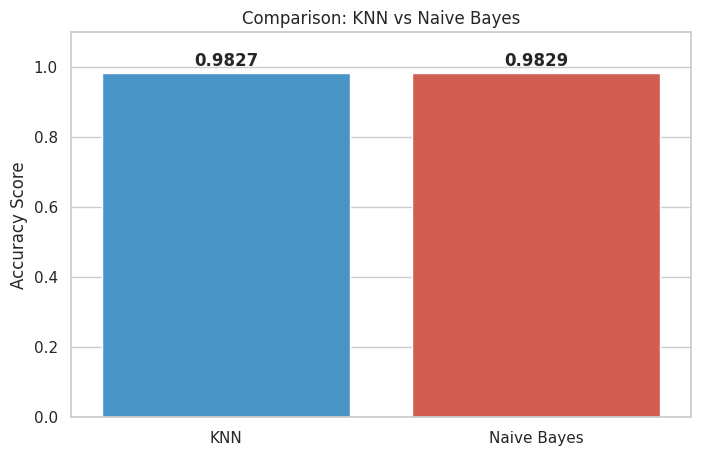

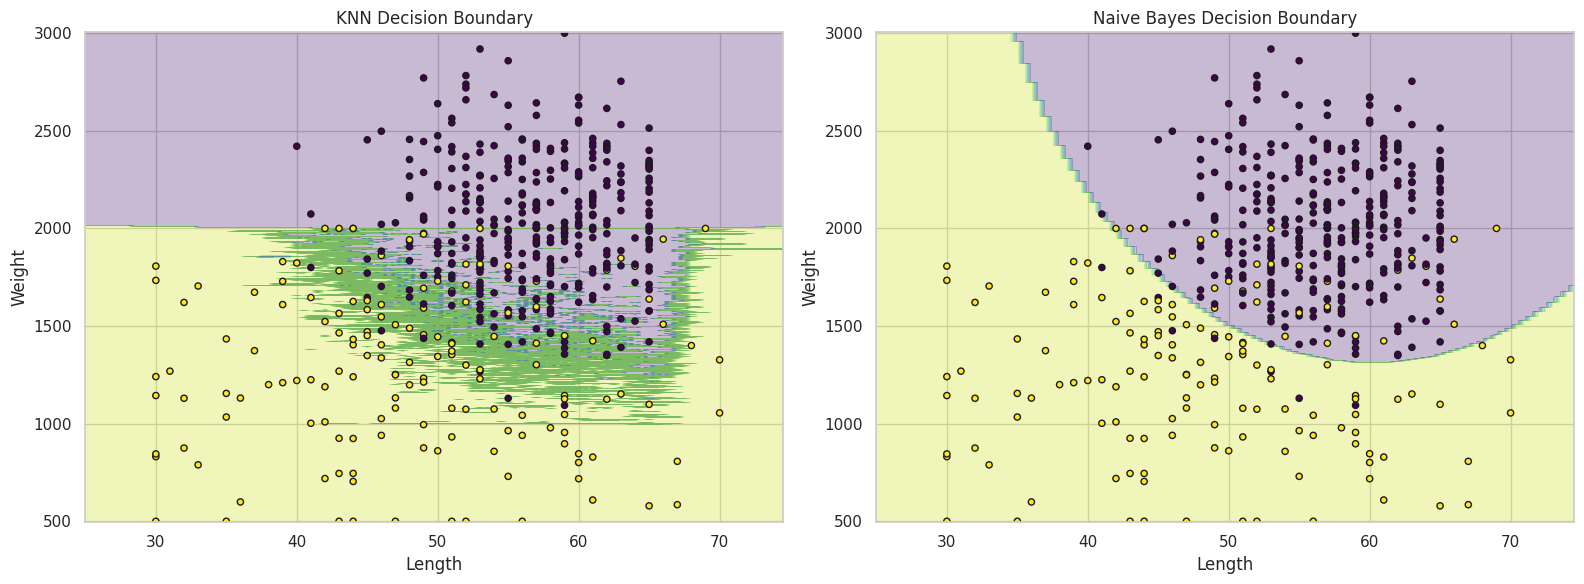

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Load the Dataset
df = pd.read_csv('fish_dataset_100k.csv')

# Define Features (X) and Target (y)
X = df[['weight', 'length', 'color']]
y = df['label']

# Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# 2. Train K-Nearest Neighbors (KNN)
# ==========================================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_acc:.4f}")

# ==========================================
# 3. Train Naive Bayes
# ==========================================
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")

# ==========================================
# 4. Draw the Difference (Accuracy Bar Chart)
# ==========================================
plt.figure(figsize=(8, 5))
algorithms = ['KNN', 'Naive Bayes']
scores = [knn_acc, nb_acc]

# Create bar chart
sns.barplot(x=algorithms, y=scores, palette=['#3498db', '#e74c3c'])
plt.ylim(0, 1.1)  # Set y-axis to show 0 to 100%
plt.ylabel('Accuracy Score')
plt.title('Comparison: KNN vs Naive Bayes')
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12, fontweight='bold')
plt.show()

# ==========================================
# 5. Draw the Difference (Decision Boundaries)
# ==========================================
# To visualize the boundaries, we use just 2 features: Length & Weight
X_2d = df[['length', 'weight']].values
y_2d = df['label'].values

# Train simplified models on just these 2 features for plotting
knn_2d = KNeighborsClassifier(n_neighbors=5).fit(X_2d, y_2d)
nb_2d = GaussianNB().fit(X_2d, y_2d)

# Create a mesh grid to plot the decision surface
h = 0.5 # step size
x_min, x_max = X_2d[:, 0].min() - 5, X_2d[:, 0].max() + 5
y_min, y_max = X_2d[:, 1].min() - 5, X_2d[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# KNN Boundary
Z_knn = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)
ax[0].contourf(xx, yy, Z_knn, alpha=0.3, cmap='viridis')
ax[0].scatter(X_2d[:500, 0], X_2d[:500, 1], c=y_2d[:500], edgecolor='k', cmap='viridis', s=20) # Plot subset of points
ax[0].set_title('KNN Decision Boundary')
ax[0].set_xlabel('Length')
ax[0].set_ylabel('Weight')

# Naive Bayes Boundary
Z_nb = nb_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_nb = Z_nb.reshape(xx.shape)
ax[1].contourf(xx, yy, Z_nb, alpha=0.3, cmap='viridis')
ax[1].scatter(X_2d[:500, 0], X_2d[:500, 1], c=y_2d[:500], edgecolor='k', cmap='viridis', s=20) # Plot subset of points
ax[1].set_title('Naive Bayes Decision Boundary')
ax[1].set_xlabel('Length')
ax[1].set_ylabel('Weight')

plt.tight_layout()
plt.show()